In [88]:
#! pip install emoji
#pip install --upgrade typing-extensions

In [89]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import emoji

import nltk
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline



# Data Loading

In [90]:
df=pd.read_csv("dialect_text.csv")
df.head(10)

dialect                                               text
0      LY  @toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...
1      LY  @AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...
2      LY  @smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...
3      LY  @AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...
4      LY  @lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...
5      LY  @alibobkr63 او حتى من اي دين او طائفة. اسف ممك...
6      LY     @muhamed01111 باهي نستنوه. بلكي مشغول ولا حاجة
7      LY  @muhamed01111 مهما اختلفنا راه نحنا خوت. والله...
8      LY  @muhamed01111 بالنسبة ليا انا والله شبعت هم ون...
9      LY  @Ajo32asLibya @Jed_ly مو نحنا الحياة عندنا مية...

# Check Dataset Balancing

In [91]:
class_counts = df['dialect'].value_counts()
print(class_counts)

EG    57636
LY    36499
LB    27617
SD    14434
MA    11539
Name: dialect, dtype: int64


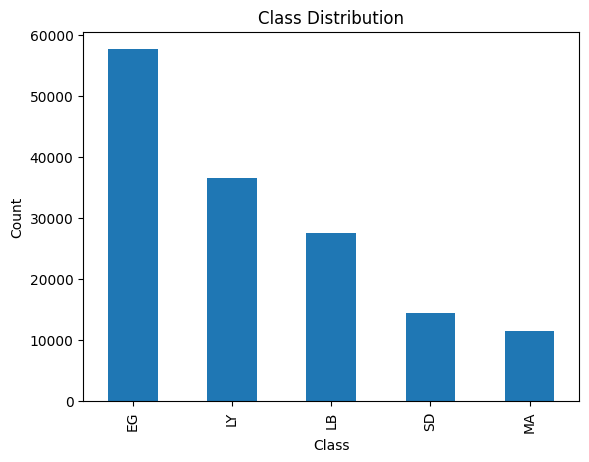

In [92]:
import matplotlib.pyplot as plt
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


### Unbalanced Data so I will split using stratify

# Data splitting

In [59]:
from sklearn.model_selection import train_test_split

X = df['text']  # Features
y = df['dialect']  # Target variable

# Splitting the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Check Dataset Balancing

In [60]:
train_class_counts = y_train.value_counts()
print(class_counts)

EG    57636
LY    36499
LB    27617
SD    14434
MA    11539
Name: dialect, dtype: int64


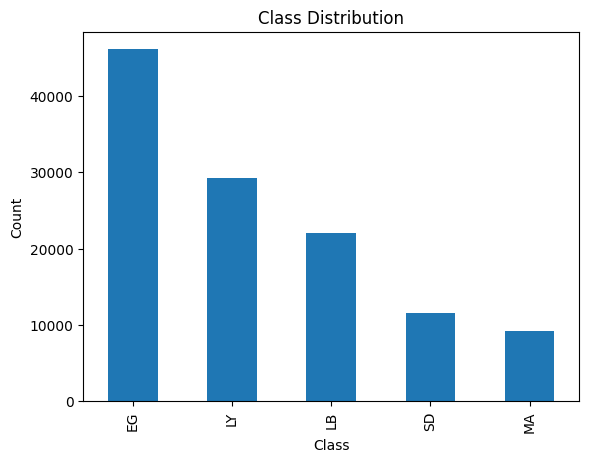

In [61]:
import matplotlib.pyplot as plt
train_class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


# clean_arabic_text

In [62]:
# Display a representative sample of text data (10%)
sample_texts = X.sample(frac=0.1, random_state=7)
for text in sample_texts:
    print(text)
    print('-' * 50)

#هوا_الحرية نداءك بهالوقت للست ليلى الصبح مش رابط الوليد بن طلال بطل يبعتلها مصاري الوضع صعب والشغل خفيف
--------------------------------------------------
@MahmoudRyad3 هي الناس دي ماتتكسفش على دمها😡
--------------------------------------------------
@auob_max علي خاطرك ياحنان لتوا قعدت جيعان ..هههه قالولي من مقولاتك
--------------------------------------------------
@Slooom_gh8 @Sara723J وفيه بند انه قيمة كسر العقد يمكن ان تزيد مع نهاية كل موسم 
يعني بعد سنتين مش حيكون نفس الشرط الجزائي
--------------------------------------------------
@emano_e1 @h32015_ جو فو زيم 🇸🇦🇲🇦 مواااح😚
--------------------------------------------------
أنا مش مع دول ياباشا
 أنا مع دوكهما 
 وبالامارة مش ساكنة فى التجمع
--------------------------------------------------
@amal_yousef9 شوفتى بقى وصلتك الضكة مش كدة 😅😅😅
--------------------------------------------------
@memo_fan بس مش قوي كده
--------------------------------------------------
@ManalWaell روحي وزاره القوي العامله هيا اللي بتدعم الشباب 😂
----------

In [63]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords_arabic = set(stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to C:\Users\Abdo
[nltk_data]     Mostafa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
def clean_arabic_text(text):
    # Remove non-Arabic characters
    arabic_text = re.sub(r'[^\u0600-\u06FF\s]+', '', text)
    
    # Remove URLs and mentions
    arabic_text = re.sub(r'http\S+|@\w+', '', arabic_text)
    
    # Remove Arabic stopwords
    arabic_text = ' '.join(word for word in arabic_text.split() if word not in stopwords_arabic)
    
    # Optionally, remove additional characters or patterns specific to your use case
    
    return arabic_text.strip()

In [65]:
X_train

0         @toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...
1         @AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...
2         @smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...
3         @AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...
4         @lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...
                                ...                        
147720    الناس دي بتنفخ في قربة مقدودة بالدارجي كده  ال...
147721    @Wail_Hamza @amiromer انت عايش وين بره السودان...
147722    مااحرم نفسي ميسي حريف ولعاب برضو ..\nمدريدي وا...
147723    ياخي ديل ماخلو  للشيطان وإبليس شي لكن يروحو وي...
147724       @abdomaged127 النبي فيك صدمتني ياخي عاوز تعويض
Name: text, Length: 147725, dtype: object

In [70]:
X_train=X_train.apply(clean_arabic_text)

In [71]:
# Display a representative sample of text data (10%)
sample_texts = X_train.sample(frac=0.1, random_state=7)
for text in sample_texts:
    print(text)
    print('-' * 50)

هواالحرية نداءك بهالوقت للست ليلى الصبح مش رابط الوليد بن طلال بطل يبعتلها مصاري الوضع صعب والشغل خفيف
--------------------------------------------------
الناس دي ماتتكسفش دمها
--------------------------------------------------
علي خاطرك ياحنان لتوا قعدت جيعان هههه قالولي مقولاتك
--------------------------------------------------
وفيه بند انه قيمة كسر العقد يمكن ان تزيد نهاية موسم يعني سنتين مش حيكون الشرط الجزائي
--------------------------------------------------
جو زيم مواااح
--------------------------------------------------
مش دول ياباشا دوكهما وبالامارة مش ساكنة فى التجمع
--------------------------------------------------
شوفتى بقى وصلتك الضكة مش كدة
--------------------------------------------------
مش قوي كده
--------------------------------------------------
روحي وزاره القوي العامله اللي بتدعم الشباب
--------------------------------------------------
انا مليش دعوة اللى قالوا
--------------------------------------------------
كسمها ليلة كروية بنت وسخة
---------------------------

In [84]:
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        transformed_X = X.copy()
        transformed_X = transformed_X.apply(self.clean_arabic_text)
        return transformed_X

    @staticmethod
    def clean_arabic_text(text):
        # Remove non-Arabic characters
        arabic_text = re.sub(r'[^\u0600-\u06FF\s]+', '', text)
        
        # Remove URLs and mentions
        arabic_text = re.sub(r'http\S+|@\w+', '', arabic_text)
        
        # Remove Arabic stopwords
        arabic_text = ' '.join(word for word in arabic_text.split() if word not in stopwords_arabic)
        
        # Optionally, remove additional characters or patterns specific to your use case
        
        return arabic_text.strip()

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

# Now you can use the pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', CustomTransformer())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing', CustomTransformer())])

In [86]:
X_train = pipeline.fit_transform(X_train,y_train)

## Save pipeline

In [94]:
import joblib

# Save the pipeline to a file
joblib.dump(pipeline, 'pipeline.pkl')

# Load the pipeline from the file
loaded_pipeline = joblib.load('pipeline.pkl')